In [97]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t


warnings.simplefilter('ignore')

# Считываем данные

In [37]:
data = pd.read_csv("happiness_report_2019.csv")

In [96]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Строим хитмап по таблице

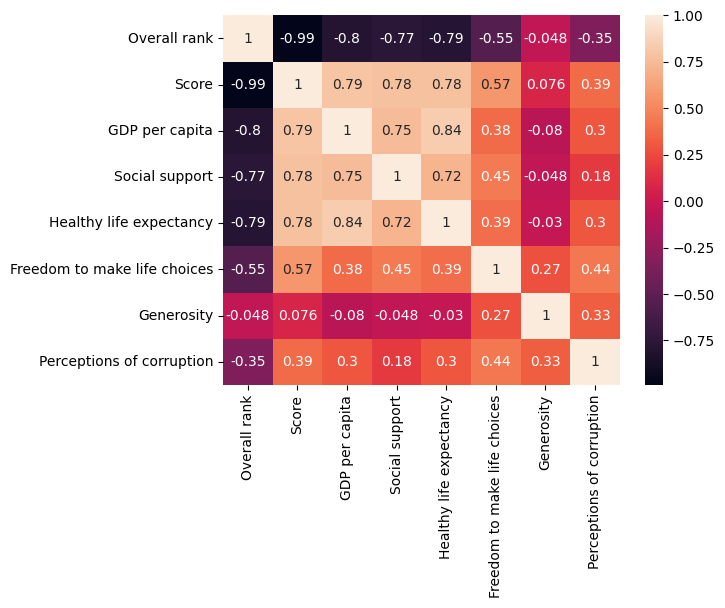

In [54]:
sns.heatmap(data.corr(), annot = True);

# Строим график распределения

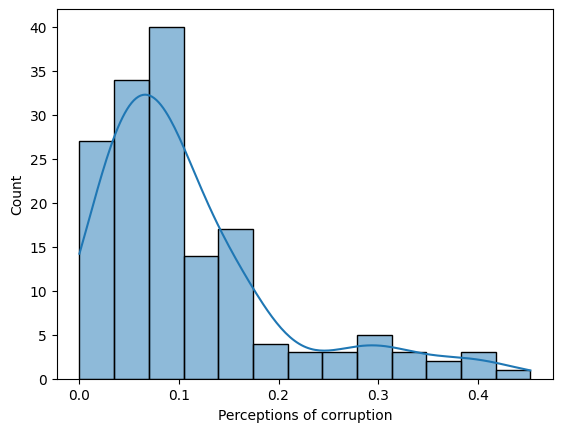

In [43]:
sns.histplot(x=data['Perceptions of corruption'], kde = True);

# Находим 25й и 75й персентили

In [114]:
l, r = np.percentile(data['Perceptions of corruption'], [25, 75])

# Собираем данные до 25го, после 75го и между 25м и 75м персентилями

In [123]:
left_data = data[data['Perceptions of corruption'] < l]
right_data = data[data['Perceptions of corruption'] > r]
mid_data = data[(data['Perceptions of corruption'] > l) & (data['Perceptions of corruption'] < r)]

# Ищем левый доверительный интервал

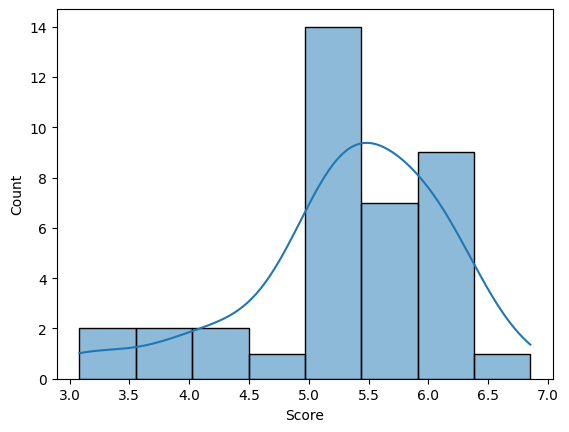

In [117]:
sns.histplot(x=left_data['Score'], kde = True);

In [118]:
sampled_left = np.array([np.random.choice(left_data['Score'], 10000, replace = True) for _ in range(10000)])
mean_left = np.mean(sampled_left, axis=1)

lpercent_left = np.percentile(mean_left, 2.5)
rpercent_left = np.percentile(mean_left, 97.5)

## Confidence interval of data < 25th percentile: (5.316; 5.347)

# 

# Ищем правый доверительный интервал

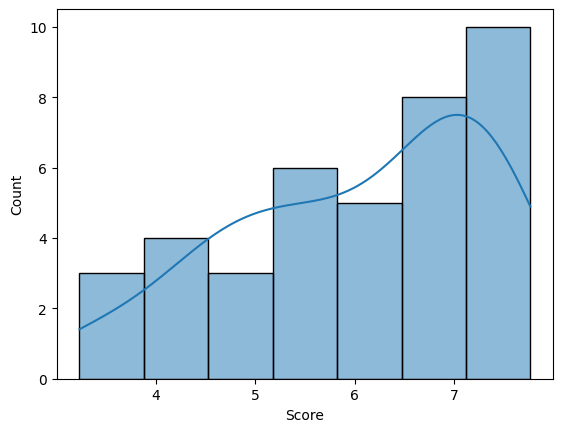

In [119]:
sns.histplot(x=right_data['Score'], kde = True);

In [120]:
sampled_right = np.array([np.random.choice(right_data['Score'], 10000, replace = True) for _ in range(10000)])
mean_right = np.mean(sampled_right, axis=1)

lpercent_right = np.percentile(mean_right, 2.5)
rpercent_right = np.percentile(mean_right, 97.5)

## Confidence interval of data > 75th percentile: (6.024; 6.073)

# 

# Ищем доверительный интервал между персентилями

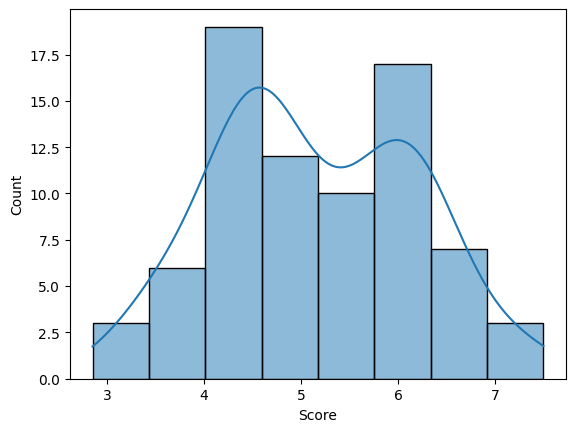

In [126]:
sns.histplot(x=mid_data['Score'], kde = True);

In [132]:
sampled_mid = np.array([np.random.choice(left_data['Score'], 10000, replace = True) for _ in range(10000)])
mean_mid = np.mean(sampled_mid, axis=1)

lpercent_mid = np.percentile(mean_left, 25)
rpercent_mid = np.percentile(mean_left, 75)

## Confidence interval of data in interval (25th percentile; 75th percentile): (5.326; 5.337)